## Hoja de Trabajo No. 5

A continuación encontrarán un Notebook interactivo desarrollado por Anaconda.org

La idea de estet Notebook es repasar lo que hacen diferentes algoritmos (Modelos).  Todos estos modelos han sido estudiados y trabajados en clase, con la excepción de uno.

El código utlizado es muy parecido al que se ha desarrollado en clase.  

**Problema**

Ustedes han sido contratados para ayudar a un herbario de renombre.  Han presentado este código de Anaconda.org al investigador principal y le ha parecido muy interesante.  Sin embargo, el investigador siente que hace fala algo, o que podría hacerse una mejor presentación.

Su tarea es ver si es correcto el presentimiento del investigador...¿puede hacerse más eficiente, utilizarse un código más "legible", presentarse mejor?


## 1. Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

In [161]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

## 2. Import Libraries

In [162]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

Loading .csv dataset from url provided by kaggle, using Pandas

In [163]:

res = 'https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/iris/iris.csv'
# csv_data = await res.text()
dataset = pd.read_csv(res)

dataset.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 3. Sumarize the Dataset

In [164]:
# Print the shape of the data
# It has 150 instances and 5 attributes
print(dataset.shape)

(150, 6)


In [165]:
# Print the first 10 rows of the data
print(dataset.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [166]:
# Print the last 10 rows of the data
print(dataset.tail(10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
140  Iris-virginica  
141  Iris-virginica  
142  Iris-virginica  
143  Iris-virginica  
144  Iris-virginica  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris

In [167]:
# Describe some basic statistics about the data
dataset.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Data cleansing

In [168]:
# First, create a dataset backup
dataset_bak = dataset

In [169]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
print(dataset.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


In [170]:
# Change column names
dataset.columns = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Species']
print(dataset.head(20))

    Sepal-length  Sepal-width  Petal-length  Petal-width      Species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [171]:
# Class distribution, to see the number of rows that belong to each species
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 5. Data Visualization

In [172]:
import seaborn as sns

### HeatMap

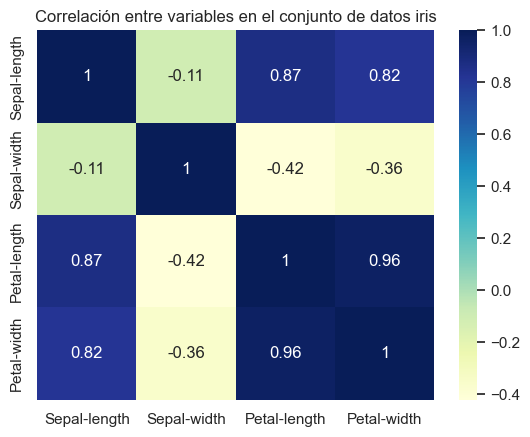

In [173]:
# Crear un heatmap para visualizar la correlación entre las variables
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlación entre variables en el conjunto de datos iris")
plt.show()

### Pair Plot

### 5.1. Univariate Plots

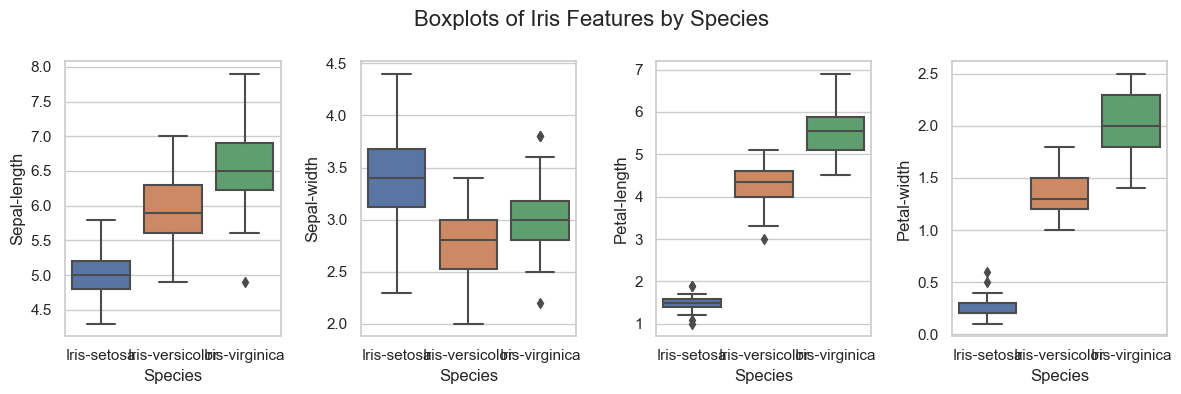

In [174]:
# Boxplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
sns.boxplot(x='Species', y='Sepal-length', data=dataset, ax=ax[0])
sns.boxplot(x='Species', y='Sepal-width', data=dataset, ax=ax[1])
sns.boxplot(x='Species', y='Petal-length', data=dataset, ax=ax[2])
sns.boxplot(x='Species', y='Petal-width', data=dataset, ax=ax[3])
plt.suptitle('Boxplots of Iris Features by Species', fontsize=16)
plt.tight_layout()
plt.show()

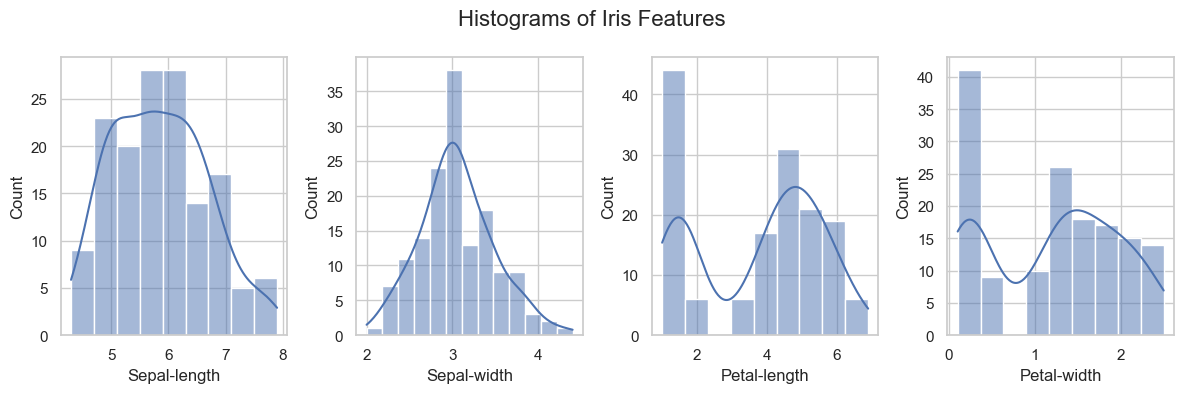

In [175]:
# Histograms
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
sns.histplot(data=dataset, x='Sepal-length', kde=True, ax=ax[0])
sns.histplot(data=dataset, x='Sepal-width', kde=True, ax=ax[1])
sns.histplot(data=dataset, x='Petal-length', kde=True, ax=ax[2])
sns.histplot(data=dataset, x='Petal-width', kde=True, ax=ax[3])
plt.suptitle('Histograms of Iris Features', fontsize=16)
plt.tight_layout()
plt.show()

### 5.2. Multivariate Plots

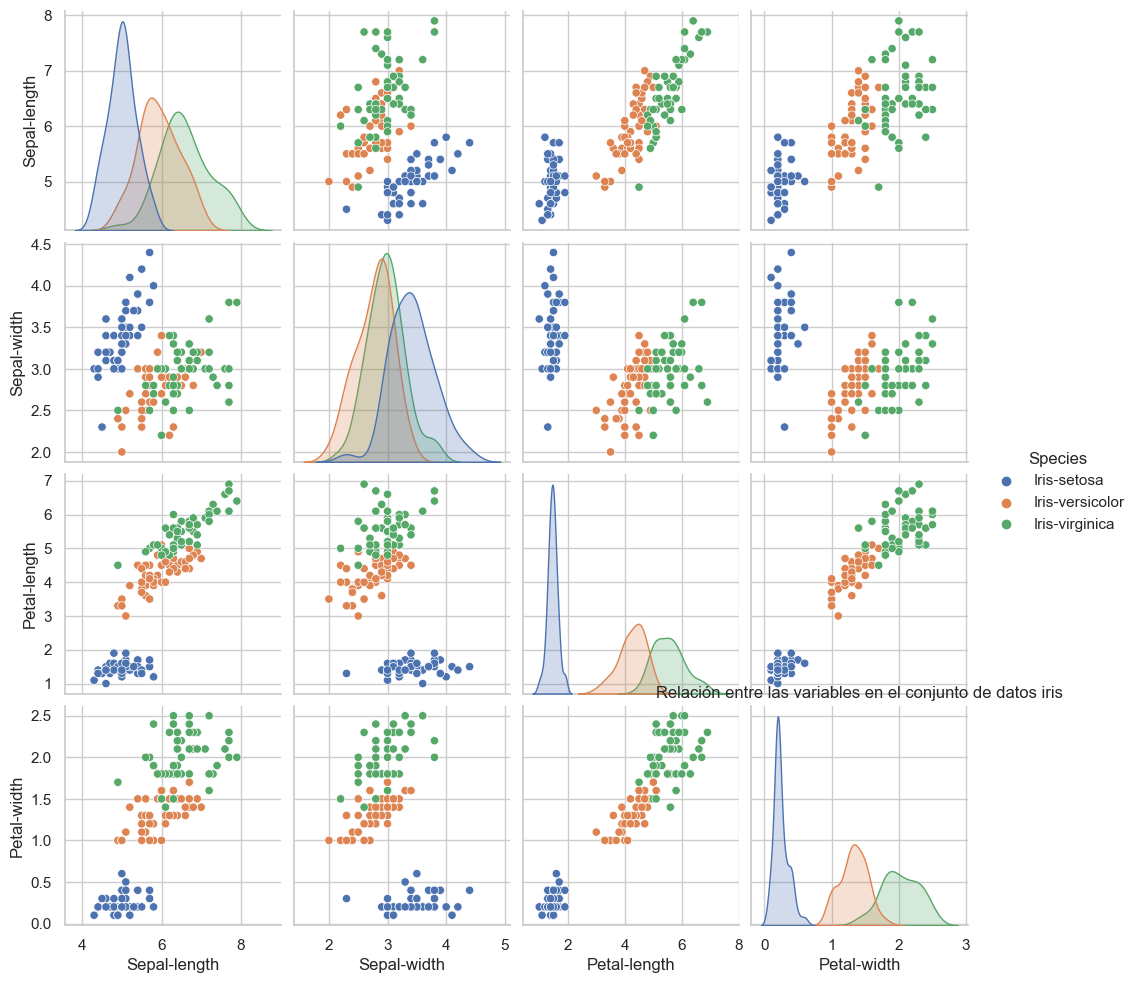

In [176]:
# Crear un pairplot para visualizar la relación entre las variables
sns.pairplot(data=dataset, hue="Species")
plt.title("Relación entre las variables en el conjunto de datos iris")
plt.show()

## 6. Evaluate Some Algorithms

- We need to know that the model we created is good.
- Use statistical methods to estimate the accuray of the models on unseen data: split the dataset in two, 80% to train, evaluate and select among our models and 20% hold back as a validation dataset

### 6.1. Create a validation dataset

Se mejoró la forma de hacer el split de los datos, aplicando técnicas modernas y profesionales de ciencias de datos. 

In [177]:
# Dividir dataset en conjunto de entrenamiento y validación
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### 6.2. Build models and evaluate them

We will use stratified 10-fold cross validation to estimate model accuracy: split the dataset in 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits

Test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [178]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# Evaluar modelos utilizando validación cruzada estratificada
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

LR: 0.958 (0.056)
LDA: 0.975 (0.038)
KNN: 0.950 (0.055)
CART: 0.917 (0.075)
NB: 0.950 (0.076)
SVM: 0.967 (0.041)


- Support Vector Machines (SVM) has the largest estimated accuracy score: ~ 98%
- Linear Discriminant Analysis (LDA) has the second one: ~ 97%

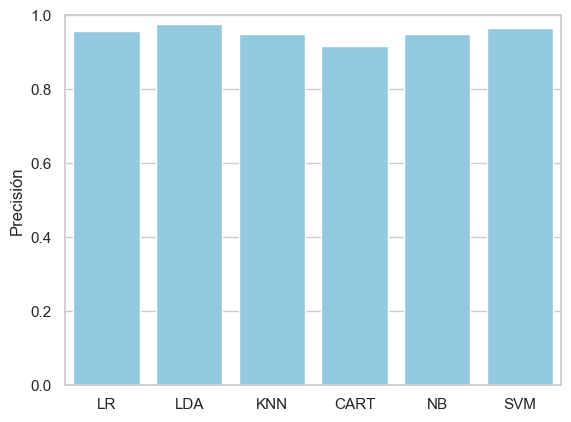

In [179]:
# Crear un DataFrame con los resultados de cada algoritmo
df_results = pd.DataFrame({'Algoritmo': names, 'Precisión': [result.mean() for result in results]})

# Crear un gráfico de barras con la precisión media y la banda de error
sns.set(style='whitegrid')
sns.barplot(x='Algoritmo', y='Precisión', data=df_results, capsize=.2, color='skyblue')

# Agregar etiquetas a los ejes
plt.xlabel(None)
plt.ylabel('Precisión')
plt.ylim(0, 1)

# Mostrar el gráfico
plt.show()

## 7. Making predictions and evaluate them

In [180]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

### Accuracy score

In [181]:
# Evaluate predictions by comparing them to the expected results in the validation set
print(accuracy_score(Y_validation, predictions))

0.06666666666666667


Gráfico de barra horizontal que muestra el accuracy score del modelo. Esto fue realizado unicamente para mejorar la presentación de los resutlados y que el cliente pueda visualizar de mejor manera

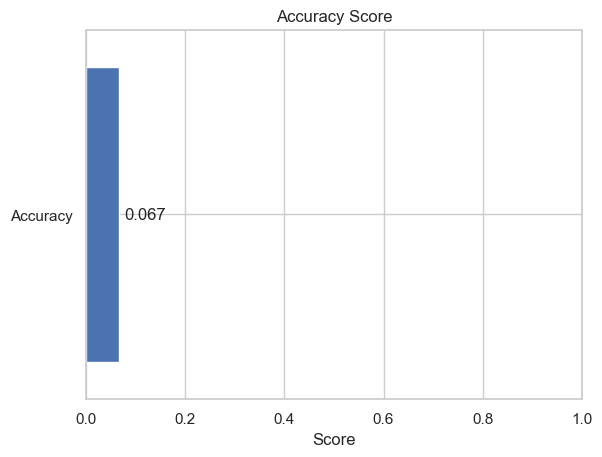

In [182]:
# Calcular el accuracy score del modelo
accuracy = accuracy_score(Y_validation, predictions)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un gráfico de barra horizontal para el accuracy score
ax.barh(['Accuracy'], [accuracy])

# Configurar el título del gráfico
ax.set_title('Accuracy Score')

# Configurar las etiquetas del eje x y y
ax.set_xlabel('Score')
ax.set_ylabel('')

# Configurar el rango del eje x y y
ax.set_xlim([0, 1])
ax.set_ylim([-0.5, 0.5])

# Mostrar el valor del accuracy score en el gráfico
ax.text(accuracy + 0.01, 0, f'{accuracy:.3f}', va='center')

# Mostrar el gráfico
plt.show()

### Matriz de confusión

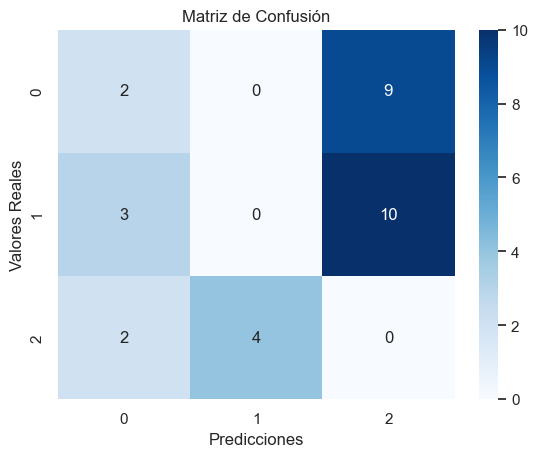

In [183]:
conf_mat = confusion_matrix(Y_validation, predictions)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

### Informe de clasificacion

In [184]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       0.29      0.18      0.22        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.00      0.00      0.00         6

       accuracy                           0.07        30
      macro avg       0.10      0.06      0.07        30
   weighted avg       0.10      0.07      0.08        30



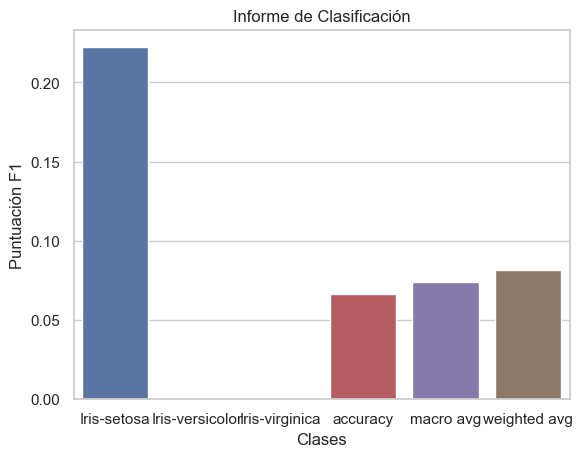

In [185]:
class_report = classification_report(Y_validation, predictions, output_dict=True)
df = pd.DataFrame(class_report).transpose()
df.drop("support", axis=1, inplace=True)

sns.barplot(x=df.index, y=df["f1-score"])
plt.title("Informe de Clasificación")
plt.xlabel("Clases")
plt.ylabel("Puntuación F1")
plt.show()